# Homework Data Visualization

- Nama: Raissa Liusty
- Cita-cita semasa kecil: President

Dataset:
[https://www.kaggle.com/blastchar/telco-customer-churn#WA_Fn-UseC_-Telco-Customer-Churn.csv

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# please import as much as you need

In [2]:
# read your data

df = pd.read_csv('telco.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Normal

## 1. Dalam rata-rata, payment method mana yang memiliki monthly charge terbesar per customernya?

Hint: Gunakan groupby payment method terhadap monthly charge dengan aggregate function rata-rata

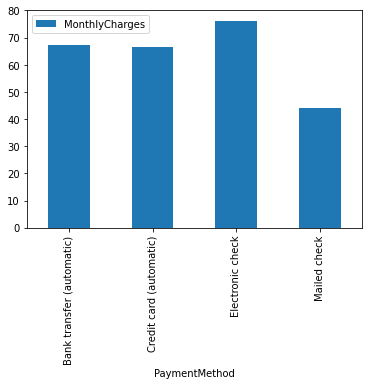

In [3]:
df2=df.groupby('PaymentMethod')['MonthlyCharges'].mean().reset_index()
df2.plot(x='PaymentMethod',y='MonthlyCharges',kind='bar')

Jadi, dari plot di atas, dapat disimpulkan bahwa payment electronic check lah yang memiliki hasil tertinggi, dan yang terendah adalah mailed check

$\textbf{Jangan lupa kasih kesimpulan dari visualisasi yang kalian buat! Isi seperti diatas ya}$

## 2. Bagaimana jumlah customer dilihat dari tenure group?

Tenure group:
- low_tenure: User dengan tenure < 21 hari
- medium_tenure: User dengan tenure 21 - 40 hari
- high_tenure: User dengan tenure > 40 hari

Hint:
- Memotong data integer menjadi group categorical dapat menggunakan beberapa macam cara, contohnya dengan numpy.where atau pandas.cut
- Mirip dengan plot pertama, namun ini menghitung jumlah unique users

In [4]:
# your code goes here!
import numpy as np
batas=[0,21,40,100]
kategori=['low_tenure','medium_tenure','high_tenure']
df['tenure_group']=pd.cut(df['tenure'],bins=batas,labels=kategori)

#np.where(consumption_energy > 400, 'high', (np.where(consumption_energy < 200, 'low', 'medium')))

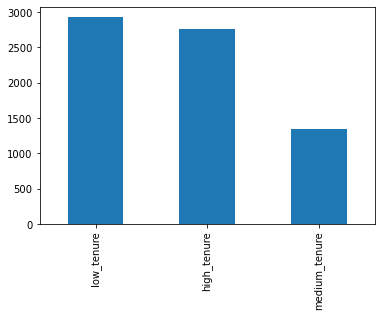

In [5]:
pd.value_counts(df['tenure_group']).plot.bar()

Jadi, dari plot di atas, kami menyimpulkan bahwa nilai tertinggi adalah user dengan tenure low, dan yang paling rendah adalah user dengan tenure medium

$\textbf{Jangan lupa kasih kesimpulan dari visualisasi yang kalian buat! Isi seperti diatas ya}$

## 3. Apakah kebanyakan dari Senior Citizen berlangganan PhoneService?

Hint:
- Dapat menggunakan feature/input parameter hue pada seaborn
- Dalam menghitung jumlah unique customer, jangan lupa perhatikan angka rasio, tidak hanya angka absolutnya



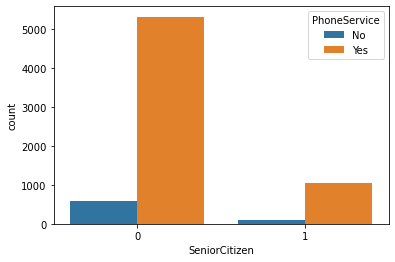

In [6]:
sns.countplot(x='SeniorCitizen',data=df,hue='PhoneService')

Jadi, dari plot di atas, dapat disimpulkan bahwa baik senior citizen ataupun bukan sebagian besar berlangganan phone service

$\textbf{Jangan lupa kasih kesimpulan dari visualisasi yang kalian buat! Isi seperti diatas ya}$

## 4. Bagaimana Distribusi dari TotalCharge?

Hint:
- Ubah datatype TotalCharge dari object ke int atau float
- Buat distribusi plot!

In [4]:
df['TotalCharges']

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [6]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')

In [7]:
df['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

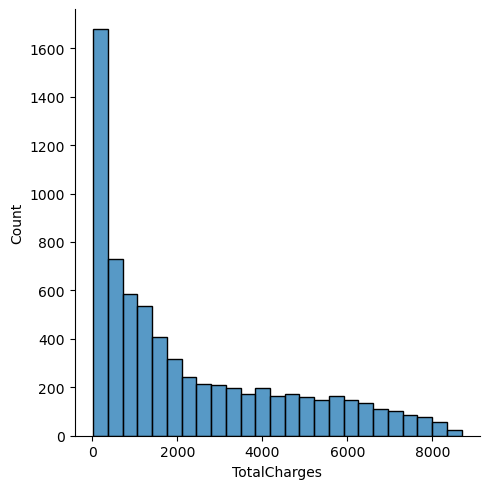

In [8]:
#df['TotalCharges']=df['TotalCharges'].astype(float)
sns.displot(x='TotalCharges',data=df)

Jadi, dari plot di atas, dapat disimpulkan bahwa...

$\textbf{Jangan lupa kasih kesimpulan dari visualisasi yang kalian buat! Isi seperti diatas ya}$

# Intermediate

## 5. Apakah customer yang memiliki monthly charges yang tinggi cenderung churn?

Hint: dapat ditunjukan melalui distribusi data

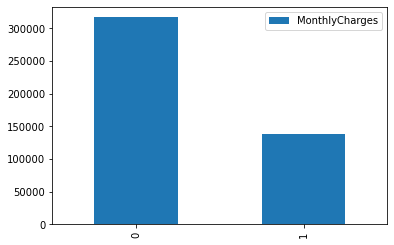

In [8]:
dfgroup = df.groupby(['Churn'])['MonthlyCharges'].sum().reset_index()
dfgroup.plot.bar()

Jadi, dari plot di atas, dapat disimpulkan bahwa dari visualisasi diatas bisa dilihatt bahwa monthly charge yang tinggi tidak cenderung churn, namun monthly charge yang rendah lah yang membuat churn

$\textbf{Jangan lupa kasih kesimpulan dari visualisasi yang kalian buat! Isi seperti diatas ya}$

## 6. Bagaimana pengaruh memiliki partner & dependents terhadap tingkat churn customer?

Hint: concat partner dan dependents, gunakan parameter 'hue' pada seaborn untuk mempermudah

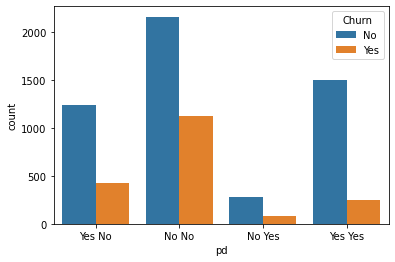

In [9]:
df['pd'] = df['Partner'] +' '+ df['Dependents'] # Partner = Yes, No && Dependents = Yes, No
sns.countplot(x='pd',data=df,hue='Churn')

Jadi, dari plot di atas, dapat disimpulkan bahwa untuk kategori manapun tingkat untuk tidak churn selalu lebih tinggi dibandingkan yang churn, sehingga menurut saya partner dan dependent tidak terlalu mempengaruhi

$\textbf{Jangan lupa kasih kesimpulan dari visualisasi yang kalian buat! Isi seperti diatas ya}$

# Soal Hard

## 7. Buatlah satu insight dari data telco customer, dan sertakan storyline pada visualisasi tersebut! dengan hanya memanfaatkan atribut PaymentMethod, CustomerID, dan Churn!

In [13]:
dfg = df.groupby(['PaymentMethod','Churn'])['customerID'].count().reset_index()
dfg

,PaymentMethod,Churn,customerID
0,Bank transfer (automatic),No,1286
1,Bank transfer (automatic),Yes,258
2,Credit card (automatic),No,1290
3,Credit card (automatic),Yes,232
4,Electronic check,No,1294
5,Electronic check,Yes,1071
6,Mailed check,No,1304
7,Mailed check,Yes,308


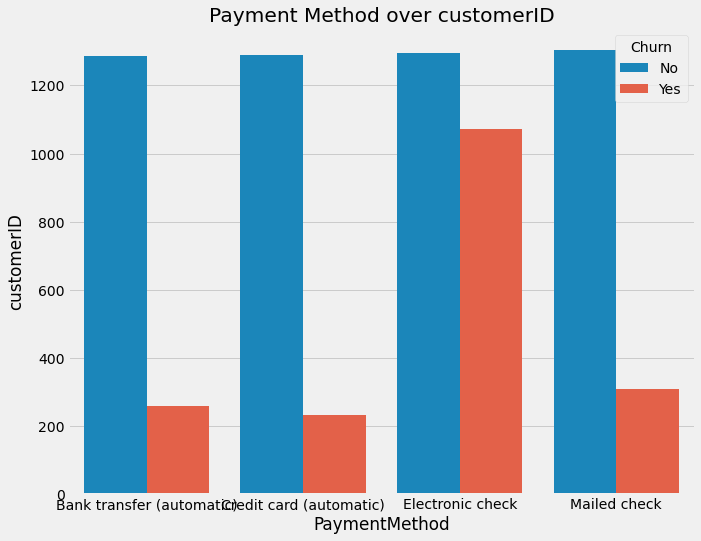

In [38]:
import matplotlib.style as style
import matplotlib.ticker as mticker
plt.figure(figsize=(10,8))
style.use('fivethirtyeight')
plt.title('Payment Method over customerID')
grap=sns.barplot(x='PaymentMethod',y='customerID',data=dfg,hue='Churn')
ticks_loc = grap.get_yticks().tolist()
grap.yaxis.set_major_locator(mticker.FixedLocator(ticks_loc))



dari visualisai tersebut bisa dilihat bahwa setiap payment method memiliki tingat churn no yang sangat jauh dibandingkan tingkat churn yes kecuali untuk metode electronic check